In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

In [2]:
wine_data = pd.read_csv('winequality.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


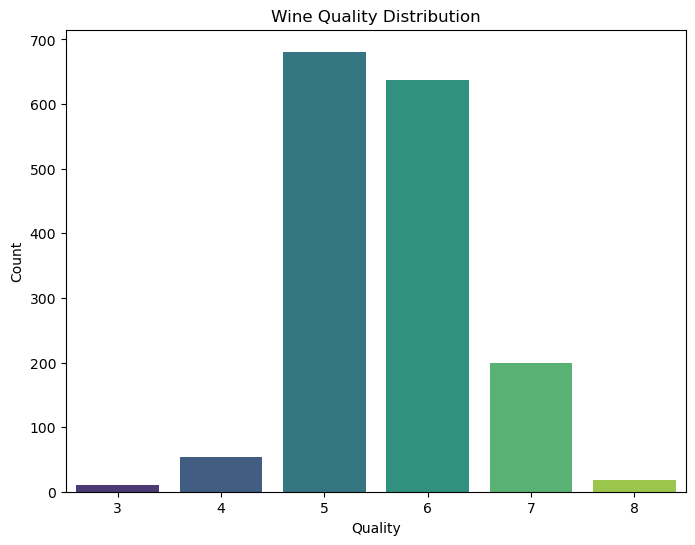

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(data=wine_data, x='quality', palette='viridis')
plt.title('Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

Separate the features (X) and target (y). 

Convert the quality column into a binary variable where 0 indicates quality <= 5 and 1 indicates quality > 5.

(1599, 5)

<Axes: xlabel='quality', ylabel='count'>

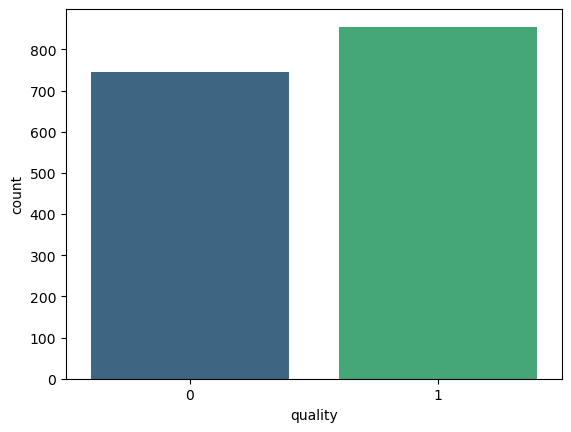

In [6]:
sns.countplot( x=y, palette='viridis')

In [ ]:
X = wine_data.drop(['quality','fixed acidity','volatile acidity','chlorides','density','free sulfur dioxide','total sulfur dioxide'], axis=1)
y = wine_data['quality']

y = (y > 5).astype(int)
X.shape
Tr_Fn = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train=Tr_Fn.fit_transform(X_train)
x_test=Tr_Fn.transform(X_test)

In [8]:
X_test


,citric acid,residual sugar,pH,sulphates,alcohol
803,0.08,2.50,3.24,0.66,9.6
124,0.17,1.60,3.39,0.48,9.5
350,0.22,2.70,3.28,0.98,9.9
682,0.31,2.25,3.33,0.54,9.8
1326,0.24,1.70,3.39,0.60,10.6
...,...,...,...,...,...
1259,0.00,2.70,3.44,0.63,11.3
1295,0.00,4.30,3.20,0.45,9.5
1155,0.25,2.20,3.15,0.53,9.8
963,0.39,2.00,3.15,0.69,11.2


In [9]:
y_test


803     1
124     0
350     1
682     0
1326    1
       ..
1259    1
1295    0
1155    0
963     1
704     0
Name: quality, Length: 320, dtype: int32

In [10]:
XGB_model = XGBClassifier()
XGB_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [11]:
svc_model=SVC(C=1,kernel='rbf')
svc_model.fit(X_train, y_train)

SVC(C=1)

In [12]:
y_pred = XGB_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       141
           1       0.82      0.84      0.83       179

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



In [13]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,

In [14]:
y_actual=np.array([y_test])
y_actual

array([[1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 

In [16]:
index=50
s1=np.array(X_test.values[index]).reshape(1,-1)
y_test1=[y_actual[0,index]]
x_test1=Tr_Fn.transform(s1)
y_pred1=XGB_model.predict(x_test1)
print(y_pred1,y_test1) 

[0] [0]


c:\Users\SOEE\anaconda3\envs\gravitones\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [31]:
#y_pred = svc_model.predict(X_test)
#print(classification_report(y_test, y_pred))

In [17]:
import pickle

In [18]:
with open('model_and_norm.pkl', 'wb') as file:pickle.dump((XGB_model,Tr_Fn), file) 

In [51]:
with open('model_and_norm.pkl', 'rb') as file:loaded_model, Tr_Fn = pickle.load(file) 
x_in=[[0.22,2.70,3.28,0.98,9.9]]
#x_in=[[0.17, 1.60, 3.39, 0.48, 9.5]]
norm=Tr_Fn.fit_transform(x_in)
x=norm.reshape(1,-1)
y=loaded_model.predict(x)

print(x_in)
print(y)

[[0.22, 2.7, 3.28, 0.98, 9.9]]
[0]


In [48]:
import pandas as pd

# Simulate the API input with correct feature selection
#selected_features = ['citric_acid', 'residual_sugar', 'pH', 'sulphates', 'alcohol']
x_in = pd.DataFrame([{'citric_acid': 0.22, 'residual_sugar': 2.7, 'pH': 3.28, 'sulphates': 0.98, 'alcohol': 9.9}])

# Ensure correct transformation using trained MinMaxScaler
norm = Tr_Fn.transform(x_in)
y_pred = loaded_model.predict(norm)

print(f"Prediction: {y_pred[0]}")


Prediction: 0


c:\Users\SOEE\anaconda3\envs\gravitones\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [29]:
import requests

url = "http://127.0.0.1:5008/predict_api"  # Update the port if needed

data = {
    "citric_acid": 0.22,
    "residual_sugar": 2.70,
    "pH": 3.28,
    "sulphates": 0.98,
    "alcohol": 9.9
}

response = requests.post(url, json=data)

print(response.json())  # Should return {'prediction': some_value}


{'error': 'The feature names should match those that were passed during fit.\nFeature names unseen at fit time:\n- citric_acid\n- residual_sugar\nFeature names seen at fit time, yet now missing:\n- citric acid\n- residual sugar\n'}


In [61]:
import requests

url = "http://127.0.0.1:5008/predict_api"

data = {
    "citric_acid": 0.22,
    "residual_sugar": 2.7,
    "pH": 3.28,
    "sulphates": 0.98,
    "alcohol": 9.9
}

#data=[[0.22,2.70,3.28,0.98,9.9]]
response = requests.post(url, json=data)

print("Wine Classified as class:", response.json())


Wine Classified as class: {'prediction': 0.0}


In [ ]:
@app.route('/predict_api', methods=['POST'])
def predict_api():
    try:
        data = request.get_json()
        x_in = pd.DataFrame([{
            float(data['citric_acid']),
            float(data['residual_sugar']),
            float(data['pH']),
            float(data['sulphates']),
            float(data['alcohol'])
        }])

        norm = Tr_Fn.fit_transform(x_in)
        x=norm.reshape(1,-1)


        y_pred = loaded_model.predict(x)
       
        print(f"Raw input: {data}")
        print(f"Transformed input: {x_in}")
        print(f"Prediction: {y_pred}")
        
        return jsonify({'prediction': int(y_pred)})
    except Exception as e:
        return jsonify({'error': str(e)})